In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\saiku\OneDrive\Desktop\OIBSIP\Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Check missing values

In [4]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


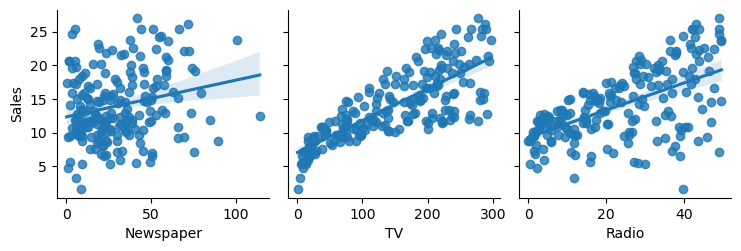

In [6]:
# create and  check the linearity assumption between each independent variable (TV, Radio, Newspaper) and the dependent variable (Sales)
sns.pairplot(data, x_vars=["Newspaper", "TV", "Radio"], y_vars="Sales",kind='reg')

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

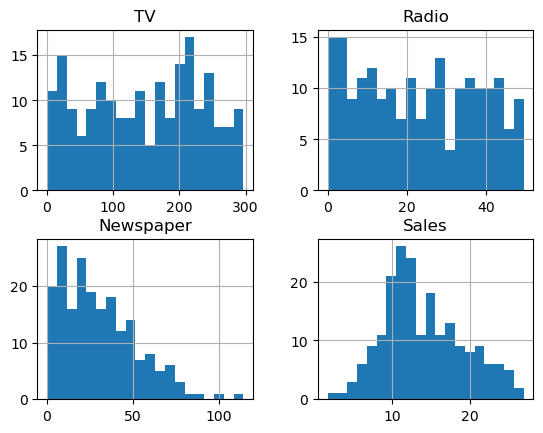

In [10]:
data.hist(bins=20)

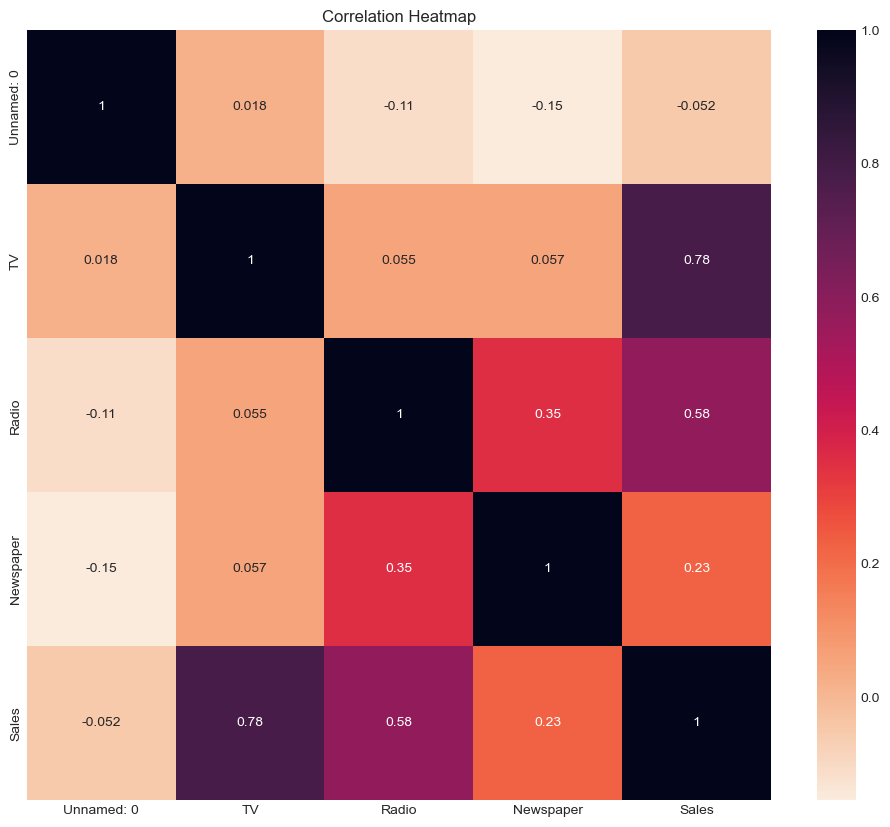

In [7]:
# Setting the style and creating a correlation heatmap
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (12, 10))
sns.heatmap(data.corr(), annot = True, cmap = 'rocket_r')
plt.title("Correlation Heatmap")
plt.show()

In [8]:
x=data[["TV","Radio","Newspaper"]]

In [9]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [10]:
y=data[["Sales"]]

In [11]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [14]:
x_train.shape

(140, 3)

In [15]:
x_test.shape

(60, 3)

In [16]:
y_train.shape

(140, 1)

In [17]:
y_test.shape

(60, 1)

# **Linear Regression**

In [18]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)


LinearRegression()

In [19]:
y_predictions = linear_model.predict(x_test)

In [34]:
#predictions

In [20]:
from sklearn.metrics import  mean_squared_error, r2_score

In [21]:
MSE = mean_squared_error(y_test,y_predictions)
R2_score= r2_score(y_test,y_predictions)

print("MSE :",MSE)
print("R2_score :",R2_score)

MSE : 5.374051588095294
R2_score : 0.8567790678044409


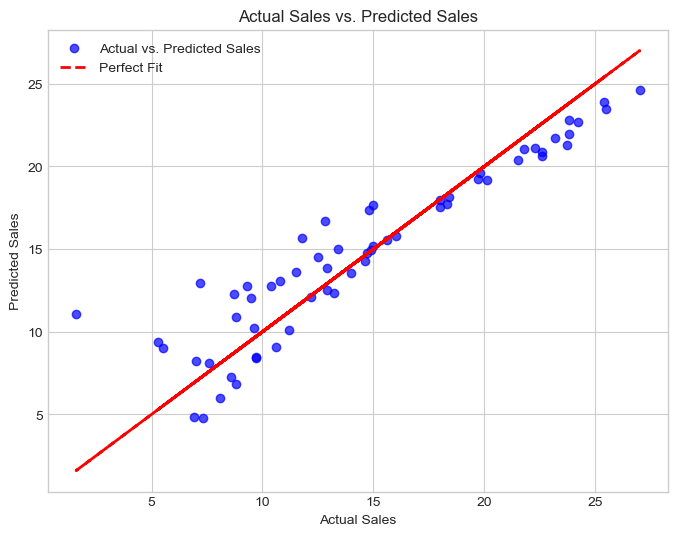

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predictions, c='blue', marker='o', alpha=0.7, label='Actual vs. Predicted Sales')
plt.plot((y_test),(y_test), linestyle='--', color='red', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# New dataset for prediction

In [23]:
# Sample new data with the same feature columns as the original dataset
new_data = pd.DataFrame({
    'TV': [20, 10, 300],
    'Radio': [20, 70, 30],
    'Newspaper': [100, 5, 15]
})

new_predictions =linear_model.predict(new_data[['TV', 'Radio', 'Newspaper']])

# Display the predictions for the new data
print("Predictions for New Data:")
print(new_predictions)

Predictions for New Data:
[[ 7.75498936]
 [17.36817088]
 [22.06781192]]


# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
tree_model = DecisionTreeRegressor(random_state = 20)
tree_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=20)

In [26]:
y_pred_tree = tree_model.predict(x_test)

In [27]:
y_pred_tree.shape

(60,)

In [28]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_tree))
print("R-squared:", r2_score(y_test, y_pred_tree))

Mean Squared Error: 1.4048333333333336
R-squared: 0.9625605492836912


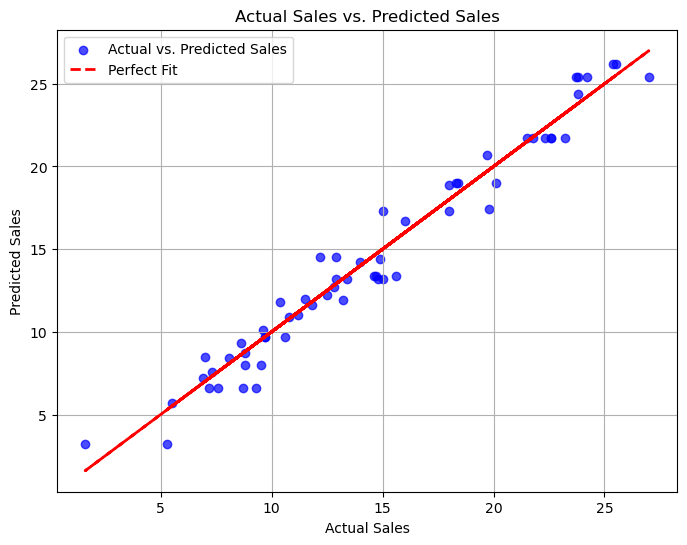

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred_tree, c='blue', marker='o', alpha=0.7, label='Actual vs. Predicted Sales')
plt.plot((y_test),(y_test), linestyle='--', color='red', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [29]:
# Sample new data with the same feature columns as the original dataset
new_data = pd.DataFrame({
    'TV': [100, 10, 30],
    'Radio': [200, 100, 30],
    'Newspaper': [10, 50, 15]
})

new_predictions = tree_model.predict(new_data[['TV', 'Radio', 'Newspaper']])

# Display the predictions for the new data
print("Predictions for New Data:")
print(new_predictions)

Predictions for New Data:
[14.7  6.6 10.8]
